# sigmoid函数

Text(0.5,1,'Sigmoid')

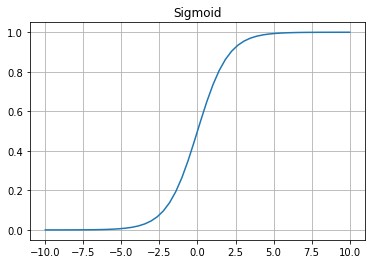

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = np.linspace(-10,10)
y_sigmoid = 1/(1+np.exp(-x))
plt.figure()
plt.plot(x,y_sigmoid)
plt.grid()
plt.title('Sigmoid')

# 梯度上升算法

Text(0.5, 1.0, 'y=-x^2+4x')

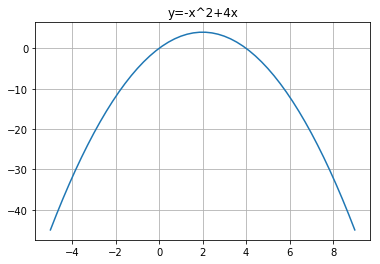

In [2]:
#画图
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = np.linspace(-5,9)
y = -x**2+4*x
plt.figure()
plt.plot(x,y)
plt.grid()
plt.title('y=-x^2+4x')

In [3]:
#梯度上升法更新参数
import matplotlib.pyplot as plt
import numpy as np
def f_prime(x_old):   #f(x)的导数
    return -2 * x_old + 4

x_old = 3#初始值
alpha = 0.001#步长，也就是学习速率，控制更新的幅度
for i in range(10000):
    x_new = x_old +alpha * f_prime(x_old)#上面提到的公式
    x_old = x_new
print(x_new)

2.0000000020202866


# 查看数据

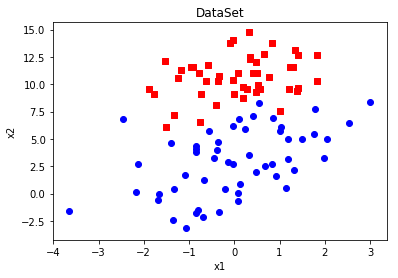

In [1]:
import os
os.chdir('C:\\Users\\CDA\\data')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

data=pd.read_table("testSet.txt",sep='	',names=['x1','x2','y'])
data['x0']=1
feature=data[['x0','x1','x2']]
label=data['y']

#0类数据
data0=data[data['y']==0]
#1类数据
data1=data[data['y']==1]


fig = plt.figure()                                          
plt.scatter(data0['x1'],data0['x2'],c = 'red', marker = 's')#绘制负样本
plt.scatter(data1['x1'],data1['x2'],c = 'blue')#绘制正样本
plt.title('DataSet')                                                #绘制title
plt.xlabel('x1'); plt.ylabel('x2')                                    #绘制label
plt.show() 

# 梯度上升算法求解系数

In [4]:
import numpy as np
import pandas as pd
import os
os.chdir('C:\\Users\\CDA\\data')
#加载数据
data=pd.read_table("testSet.txt",sep='	',names=['x1','x2','y'])
data['x0']=1
feature=data[['x0','x1','x2']]
label=data['y']
feature=np.mat(feature)
label=np.mat(label).T

#sigmoid函数
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

#梯度上升
def gradAscent(dataMatrix, classLabels):
    m, n = np.shape(dataMatrix)              #返回dataMatrix的大小。m为行数,n为列数。
    alpha = 0.001                            #移动步长,也就是学习速率,控制更新的幅度。
    maxCycles = 100000                          #最大迭代次数
    weights = np.mat(np.ones((n,1)))   #theta              #初始化，3行，一列
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)          #梯度上升矢量化公式
        error = classLabels - h
        weights = weights + alpha * dataMatrix.T * error
    return weights                        #将矩阵转换为数组，返回权重数组
#主函数
if __name__ == '__main__':        
    weights=gradAscent(feature, label)
    print(weights)

[[14.72593649]
 [ 1.25180727]
 [-1.99917231]]


# 预测

In [9]:
data=np.mat([[1,0,10],[1,-1,15],[1,0,0],[1,1,0]])#预测
h1 = sigmoid(data* weights) #1，为,正样本的概率
print(h1)
h2=1-np.array(h1)#0，为负样本的概率
print(h2)

[[5.13878466e-03]
 [6.73437633e-08]
 [9.99999598e-01]
 [9.99999885e-01]]
[[9.94861215e-01]
 [9.99999933e-01]
 [4.02352652e-07]
 [1.15067852e-07]]


# 画最优决策边界

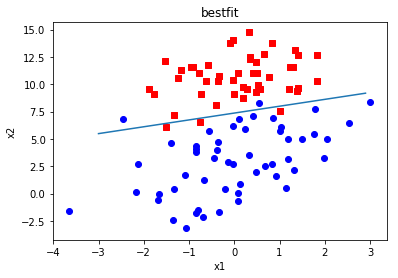

In [13]:
data=pd.read_table("testSet.txt",sep='	',names=['x1','x2','y'])
data['x0']=1
feature=data[['x0','x1','x2']]
label=data['y']

#0类数据
data0=data[data['y']==0]
#1类数据
data1=data[data['y']==1]

fig = plt.figure()                                          #添加subplot
plt.scatter(data0['x1'],data0['x2'], c = 'red', marker = 's')#绘制负样本
plt.scatter(data1['x1'],data1['x2'], c = 'blue')#
weights=weights.getA()
x1 = np.arange(-3.0, 3.0, 0.1)
x2 = (-weights[0] - weights[1] * x1) / weights[2]    #sigmod函数x=0处为最佳分界
plt.plot(x1, x2)
plt.title('bestfit')                                                #绘制title
plt.xlabel('x1'); plt.ylabel('x2')                                    #绘制label
plt.show() 

# sklearn中的逻辑回归

In [15]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression()
clf.fit(X, y)#训练
clf.predict(X[:10, :])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
clf.predict_proba(X[:2, :]) #输出分类的概率

array([[8.79681649e-01, 1.20307538e-01, 1.08131372e-05],
       [7.99706325e-01, 2.00263292e-01, 3.03825365e-05]])

In [21]:
clf.score(X, y)#评分，准确率

0.9733333333333334

In [ ]:
clf.score

In [18]:
from sklearn import metrics
print(metrics.classification_report(y, clf.predict(X)))#分类报告

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

   micro avg       0.97      0.97      0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [19]:
print(metrics.confusion_matrix(y, clf.predict(X)))#混淆矩阵

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


# 病马死亡率预测

In [30]:
#病马死亡率预测
import pandas as pd
import os
os.chdir('C:\\Users\\CDA\\data')
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

train_data=pd.read_table("horseColicTraining.txt",sep='	',names=range(22))
trainingSet=train_data.iloc[:,0:21]#特征
trainingLabels=train_data.iloc[:,21:]#label

test_data=pd.read_table("horseColicTest.txt",sep='	')
testSet=test_data.iloc[:,0:21]
testLabels=test_data.iloc[:,21:]



,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2.0,1.0,38.5,66.0,28.0,3.0,3.0,0.0,2.0,5.0,...,0.0,0.0,0.0,3.0,5.0,45.0,8.4,0.0,0.0,0.0
1,1.0,1.0,39.2,88.0,20.0,0.0,0.0,4.0,1.0,3.0,...,0.0,0.0,0.0,4.0,2.0,50.0,85.0,2.0,2.0,0.0
2,2.0,1.0,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,...,0.0,0.0,0.0,1.0,1.0,33.0,6.7,0.0,0.0,1.0
3,1.0,9.0,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,...,1.0,2.0,5.0,3.0,0.0,48.0,7.2,3.0,5.3,0.0
4,2.0,1.0,37.3,104.0,35.0,0.0,0.0,6.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,74.0,7.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1.0,0.0,120.0,70.0,4.0,0.0,4.0,2.0,2.0,...,0.0,0.0,0.0,0.0,5.0,55.0,65.0,0.0,0.0,0.0
295,2.0,1.0,37.2,72.0,24.0,3.0,2.0,4.0,2.0,4.0,...,3.0,1.0,0.0,4.0,4.0,44.0,0.0,3.0,3.3,0.0
296,1.0,1.0,37.5,72.0,30.0,4.0,3.0,4.0,1.0,4.0,...,2.0,1.0,0.0,3.0,5.0,60.0,6.8,0.0,0.0,0.0
297,1.0,1.0,36.5,100.0,24.0,3.0,3.0,3.0,1.0,3.0,...,3.0,1.0,0.0,4.0,4.0,50.0,6.0,3.0,3.4,1.0


In [29]:
params = {"C":[0.21,0.2,0.118]}
classifier = LogisticRegression()
gs = GridSearchCV(classifier,params,cv=3)

gs.fit(trainingSet, trainingLabels)
print(gs.score(testSet,testLabels))
print(gs.best_params_)

0.7272727272727273
{'C': 0.2}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

In [7]:
print(metrics.classification_report(testLabels, predicted))#打印分类报告

              precision    recall  f1-score   support

           0       0.54      0.65      0.59        20
           1       0.83      0.76      0.80        46

   micro avg       0.73      0.73      0.73        66
   macro avg       0.69      0.71      0.69        66
weighted avg       0.74      0.73      0.73        66



In [8]:
print(metrics.confusion_matrix(testLabels, predicted))#混淆矩阵

[[13  7]
 [11 35]]


In [9]:
predict_proba=classifier.predict_proba(testSet)
predict_proba#输出概率

array([[0.08800035, 0.91199965],
       [0.36293775, 0.63706225],
       [0.37016044, 0.62983956],
       [0.46481409, 0.53518591],
       [0.0988608 , 0.9011392 ],
       [0.22724543, 0.77275457],
       [0.21615014, 0.78384986],
       [0.08200838, 0.91799162],
       [0.75053564, 0.24946436],
       [0.18305259, 0.81694741],
       [0.88686436, 0.11313564],
       [0.84403674, 0.15596326],
       [0.45860956, 0.54139044],
       [0.18791493, 0.81208507],
       [0.3058153 , 0.6941847 ],
       [0.22137555, 0.77862445],
       [0.71015535, 0.28984465],
       [0.91232555, 0.08767445],
       [0.44297478, 0.55702522],
       [0.71089048, 0.28910952],
       [0.36880893, 0.63119107],
       [0.79292741, 0.20707259],
       [0.92816114, 0.07183886],
       [0.06557539, 0.93442461],
       [0.25676892, 0.74323108],
       [0.07965132, 0.92034868],
       [0.56671429, 0.43328571],
       [0.14433976, 0.85566024],
       [0.18795548, 0.81204452],
       [0.07259017, 0.92740983],
       [0.

In [10]:
predict_proba.shape

(66, 2)

# ROC曲线绘制

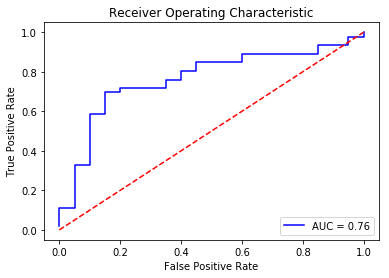

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline
false_positive_rate, true_positive_rate, thresholds = roc_curve(testLabels, predict_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)#求面积

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [23]:
thresholds

array([0.96101308, 0.92740983, 0.92661725, 0.84448282, 0.84406328,
       0.68080722, 0.6753773 , 0.63119125, 0.62983918, 0.62384037,
       0.5470841 , 0.53518597, 0.49557288, 0.46257933, 0.45432734,
       0.41553818, 0.28984475, 0.26879994, 0.20707252, 0.16376366,
       0.15596346, 0.12434939, 0.08767438, 0.08437848, 0.07183881,
       0.04948199])

In [24]:
false_positive_rate

array([0.  , 0.  , 0.05, 0.05, 0.1 , 0.1 , 0.15, 0.15, 0.2 , 0.2 , 0.35,
       0.35, 0.4 , 0.4 , 0.45, 0.45, 0.6 , 0.6 , 0.7 , 0.8 , 0.85, 0.85,
       0.95, 0.95, 1.  , 1.  ])

# 手写数字识别

In [1]:
#逻辑回归手写数字识别
import numpy as np
from os import listdir
import os
os.chdir(r'C:\Users\CDA')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
def img2vector(filename):
    returnVect = np.zeros((1, 1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0, 32*i+j] = int(lineStr[j])
    return returnVect

In [2]:
hwLabels = []                                       #测试集的Labels，后面用来比对计算错误率
trainingFileList = listdir('trainingDigits')        #listdir()是返回目录下的文件名
m = len(trainingFileList)                           #返回文件夹下文件的个数
trainingMat = np.zeros((m, 1024))                   #初始化训练的Mat矩阵,测试集，就是批量处理
for i in range(m):                                  #从文件名中解析出训练集的类别
    fileNameStr = trainingFileList[i]               #获得文件的名字；是为了下一步获取每个文件的数字类别
    classNumber = int(fileNameStr.split('_')[0])    #获得分类的数字；因为分隔后的第一个是代表类别的数字
    hwLabels.append(classNumber)                    #将获得的类别添加到hwLabels中
    trainingMat[i,:] = img2vector('trainingDigits/%s' % (fileNameStr))     
#将每一个文件的1x1024数据存储到trainingMat矩阵中，trainingMat最后是m行1024列的矩阵

In [4]:
classifier1 = LogisticRegression(max_iter=1000).fit(trainingMat, hwLabels)
testFileList = listdir('testDigits')                #返回testDigits目录下的文件列表   同样也要对测试集进行相同的处理
errorCount = 0.0                                    #错误检测计数
mTest = len(testFileList)                           #测试数据的数量
    
for i in range(mTest):                              #从文件中解析出测试集的类别并进行分类测试  
    fileNameStr = testFileList[i]                   #获得文件的名字
    classNumber = int(fileNameStr.split('_')[0])    #获得分类的数字
    vectorUnderTest = img2vector('testDigits/%s' % (fileNameStr))     #获得测试集的1x1024向量,用于训练
    classifierResult=classifier1.predict(vectorUnderTest) #获得预测结果
        #print("分类返回结果为%d\t真实结果为%d" % (classifierResult, classNumber)) 
    if(classifierResult != classNumber):
        errorCount += 1.0
print("总共错了%d个数据\n错误率为%f%%" % (errorCount, errorCount/mTest * 100))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


总共错了10个数据
错误率为3.289474%


In [7]:
classifier2 = LogisticRegression(solver="sag",max_iter=1000).fit(trainingMat, hwLabels)
testFileList = listdir('testDigits')                #返回testDigits目录下的文件列表   同样也要对测试集进行相同的处理
errorCount = 0.0                                    #错误检测计数
mTest = len(testFileList)                           #测试数据的数量
    
for i in range(mTest):                              #从文件中解析出测试集的类别并进行分类测试  
    fileNameStr = testFileList[i]                   #获得文件的名字
    classNumber = int(fileNameStr.split('_')[0])    #获得分类的数字
    vectorUnderTest = img2vector('testDigits/%s' % (fileNameStr))     #获得测试集的1x1024向量,用于训练
    classifierResult=classifier2.predict(vectorUnderTest) #获得预测结果
        #print("分类返回结果为%d\t真实结果为%d" % (classifierResult, classNumber)) 
    if(classifierResult != classNumber):
        errorCount += 1.0
print("总共错了%d个数据\n错误率为%f%%" % (errorCount, errorCount/mTest * 100))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


总共错了10个数据
错误率为3.289474%


In [8]:
classifier3 = LogisticRegression(solver='newton-cg',max_iter=1000).fit(trainingMat, hwLabels)
testFileList = listdir('testDigits')                #返回testDigits目录下的文件列表   同样也要对测试集进行相同的处理
errorCount = 0.0                                    #错误检测计数
mTest = len(testFileList)                           #测试数据的数量
    
for i in range(mTest):                              #从文件中解析出测试集的类别并进行分类测试  
    fileNameStr = testFileList[i]                   #获得文件的名字
    classNumber = int(fileNameStr.split('_')[0])    #获得分类的数字
    vectorUnderTest = img2vector('testDigits/%s' % (fileNameStr))     #获得测试集的1x1024向量,用于训练
    classifierResult=classifier3.predict(vectorUnderTest) #获得预测结果
        #print("分类返回结果为%d\t真实结果为%d" % (classifierResult, classNumber)) 
    if(classifierResult != classNumber):
        errorCount += 1.0
print("总共错了%d个数据\n错误率为%f%%" % (errorCount, errorCount/mTest * 100))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


总共错了11个数据
错误率为3.618421%


In [34]:
classifier4 = LogisticRegression(solver='saga',multi_class="multinomial",max_iter=1000).fit(trainingMat, hwLabels)
testFileList = listdir('testDigits')                #返回testDigits目录下的文件列表   同样也要对测试集进行相同的处理
errorCount = 0.0                                    #错误检测计数
mTest = len(testFileList)                           #测试数据的数量
    
for i in range(mTest):                              #从文件中解析出测试集的类别并进行分类测试  
    fileNameStr = testFileList[i]                   #获得文件的名字
    classNumber = int(fileNameStr.split('_')[0])    #获得分类的数字
    vectorUnderTest = img2vector('testDigits/%s' % (fileNameStr))     #获得测试集的1x1024向量,用于训练
    classifierResult=classifier4.predict(vectorUnderTest) #获得预测结果
        #print("分类返回结果为%d\t真实结果为%d" % (classifierResult, classNumber)) 
    if(classifierResult != classNumber):
        errorCount += 1.0
print("总共错了%d个数据\n错误率为%f%%" % (errorCount, errorCount/mTest * 100))

总共错了9个数据
错误率为2.960526%


In [5]:
params = {"C":[0.2,0.4,0.6,0.8]}

classifier4 = LogisticRegression(solver='newton-cg',multi_class="multinomial",max_iter=1000,n_jobs=2)

aaa = GridSearchCV(classifier4,params,cv=4)
aaa.fit(trainingMat, hwLabels)
print(aaa.score(vectorUnderTest,classNumber))
print(aaa.best_params_)

TypeError: Expected sequence or array-like, got <class 'int'>